In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC, SVR
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.cluster import KMeans
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scipy import stats

In [2]:
from sklearn.decomposition import PCA
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
from sklearn.model_selection import GridSearchCV


In [3]:
df=pd.read_csv('cardio_train.csv',sep=";")
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


# Preprocessing

In [4]:
df.duplicated().sum()

np.int64(0)

In [5]:
df.isnull().sum()

,0
id,0
age,0
gender,0
height,0
weight,0
ap_hi,0
ap_lo,0
cholesterol,0
gluc,0
smoke,0


In [6]:
df.dtypes

,0
id,int64
age,int64
gender,int64
height,int64
weight,float64
ap_hi,int64
ap_lo,int64
cholesterol,int64
gluc,int64
smoke,int64


In [7]:
df['age']=(df['age']/365.25).round()
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50.0,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55.0,1,156,85.0,140,90,3,1,0,0,1,1
2,2,52.0,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48.0,2,169,82.0,150,100,1,1,0,0,1,1
4,4,48.0,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,53.0,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,62.0,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,52.0,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,61.0,1,163,72.0,135,80,1,2,0,0,0,1


In [8]:
# Get all categorical columns
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
print("Categorical Columns:", categorical_columns)

Categorical Columns: Index([], dtype='object')


# EDA

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  float64
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(2), int64(11)
memory usage: 6.9 MB


In [10]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,53.303157,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,6.760171,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,30.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,48.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,54.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,58.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,65.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
df['cardio'].value_counts()
# no need for balance

,count
cardio,
0,35021
1,34979


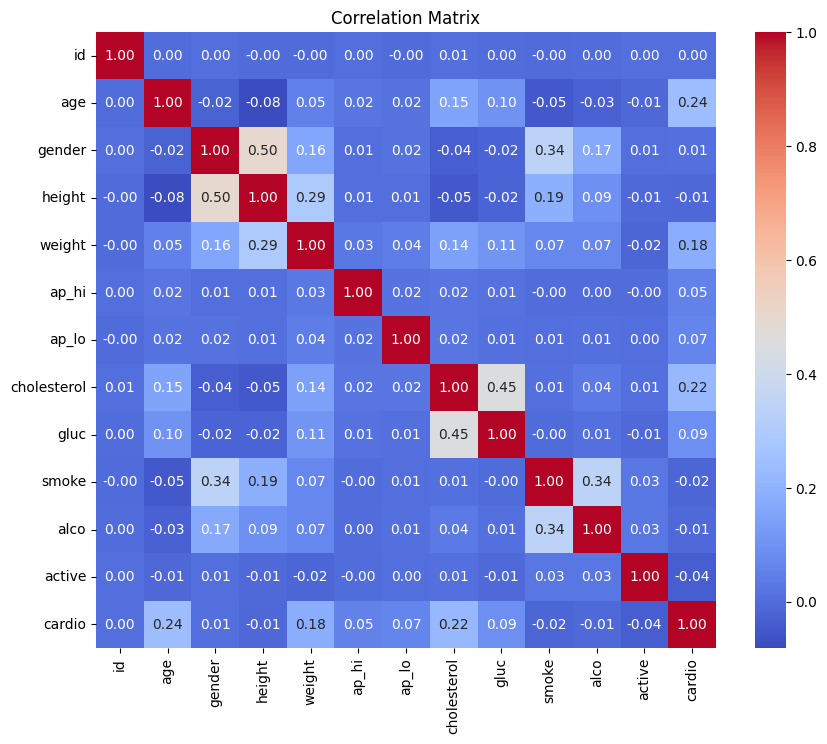

In [12]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [13]:
x = df.drop('cardio', axis = 1)
y = df['cardio']

In [14]:
key_features=['age', 'height', 'weight', 'ap_hi', 'ap_lo']

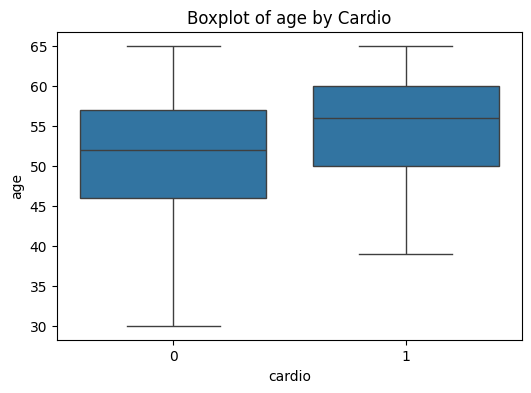

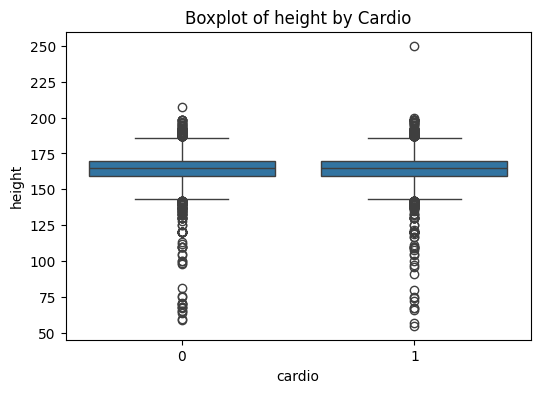

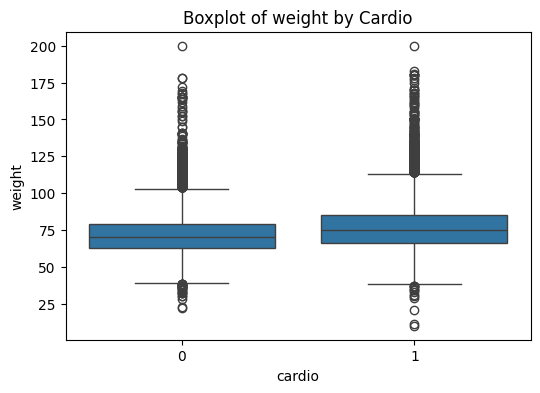

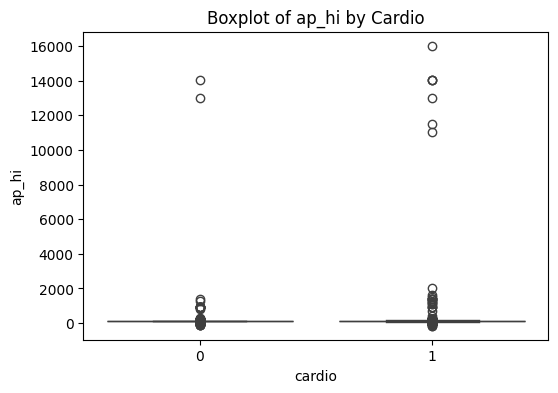

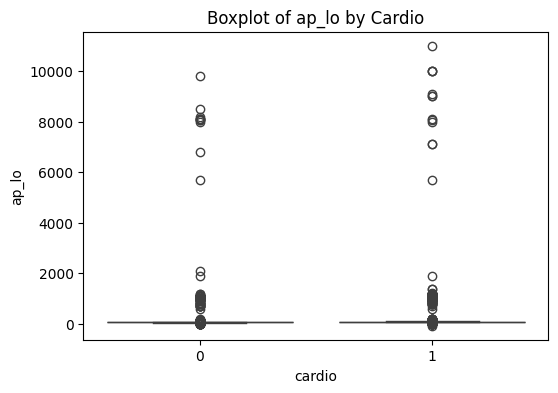

In [15]:
for feature in key_features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='cardio', y=feature, data=df)
    plt.title(f'Boxplot of {feature} by Cardio')
    plt.show()

# Distrubtion Of Featuers

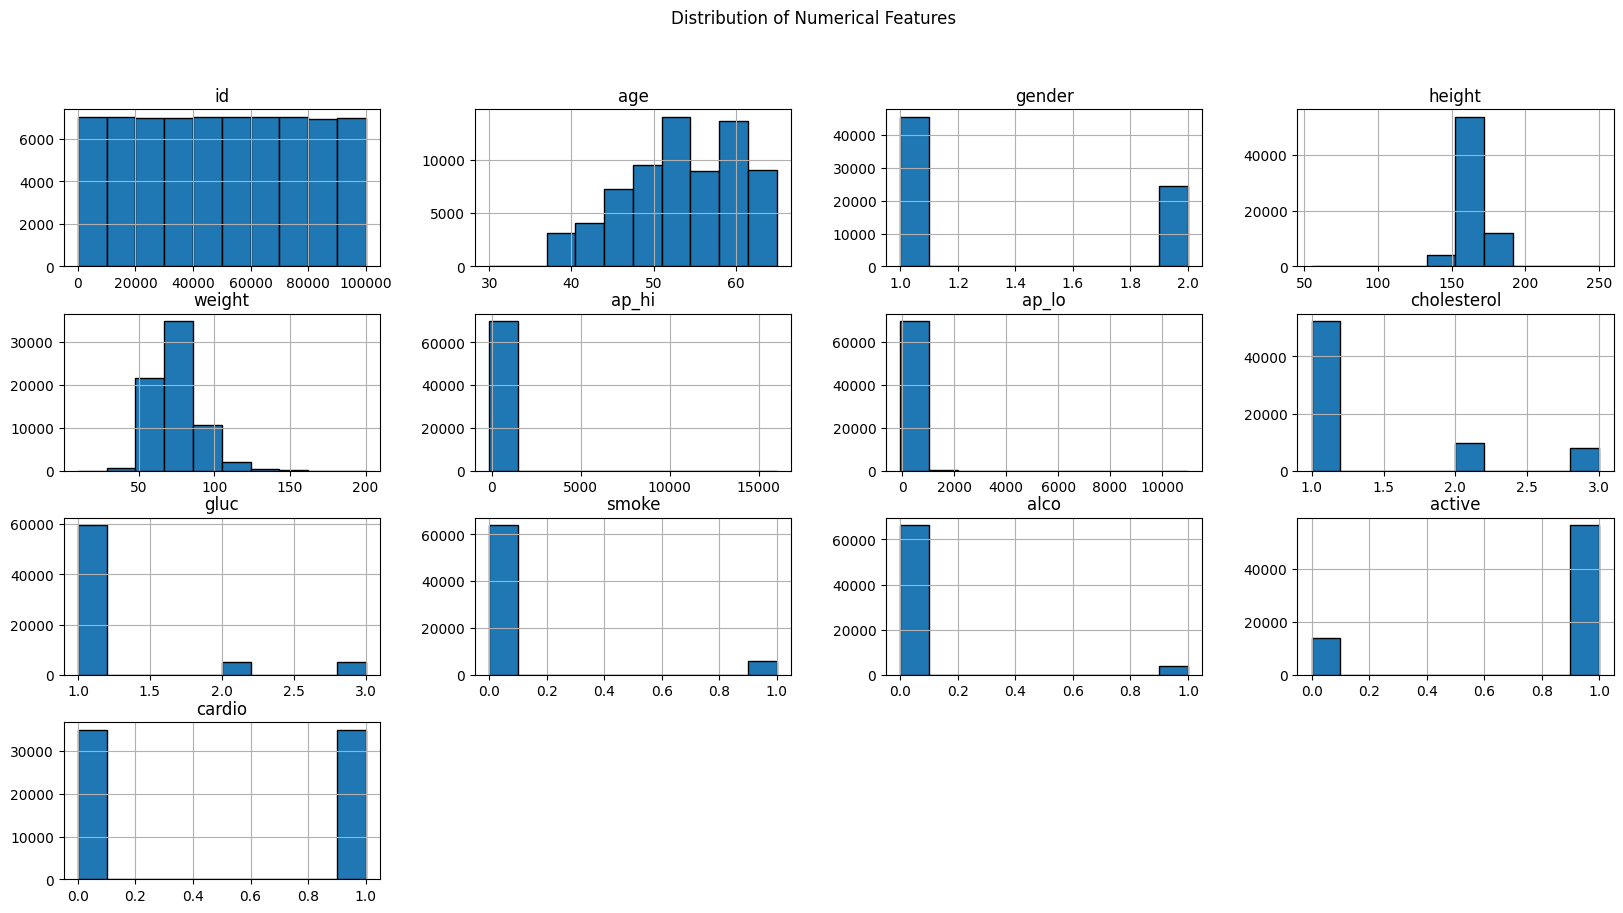

In [16]:
df.hist(figsize=(20, 10), edgecolor='black')
plt.suptitle("Distribution of Numerical Features")
plt.show()

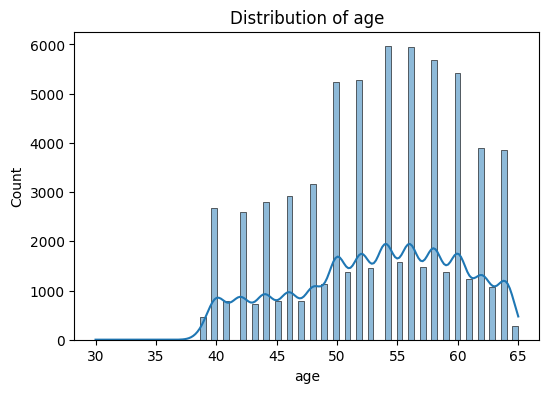

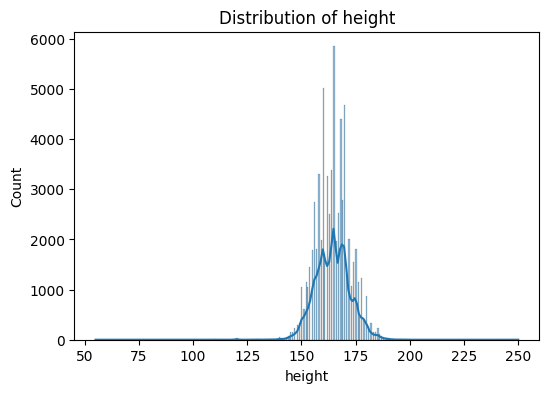

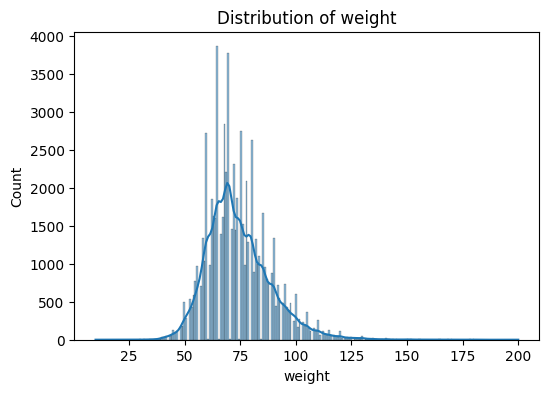

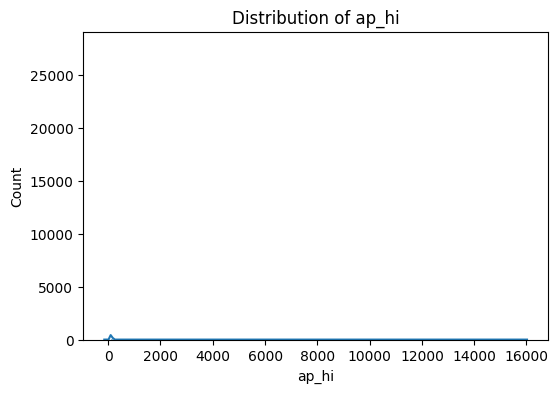

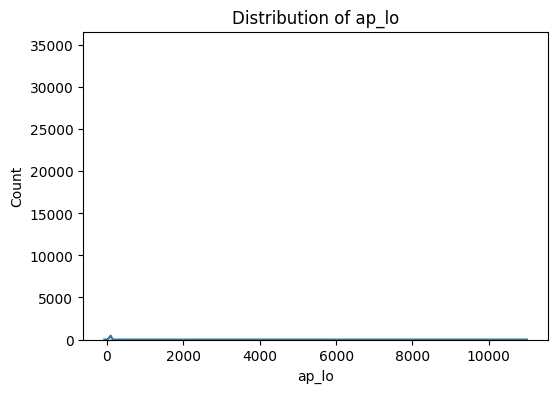

In [17]:
for feature in key_features:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()


# Ensemble Stacked Neural Network Mode

In [18]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)

In [19]:
pca=PCA(n_components=0.95)  # to  keep 95 the info the data
X_pca=pca.fit_transform(X_scaled)

In [20]:
x_train, x_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=0)

In [21]:
# first we need to make base nn
nn_clf = Sequential([
    Dense(128, activation='relu', input_shape=(x_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])
nn_clf.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
nn_clf.fit(
    x_train, y_train,
    validation_data=(x_test,y_test),
    epochs=50,
    batch_size=32,
    callbacks=[early_stop]
)

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1750/1750 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6706 - loss: 0.6111 - val_accuracy: 0.7207 - val_loss: 0.5757
Epoch 2/50
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7243 - loss: 0.5674 - val_accuracy: 0.7253 - val_loss: 0.5633
Epoch 3/50
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7251 - loss: 0.5603 - val_accuracy: 0.7266 - val_loss: 0.5592
Epoch 4/50
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7285 - loss: 0.5523 - val_accuracy: 0.7277 - val_loss: 0.5534
Epoch 5/50
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.7349 - loss: 0.5461 - val_accuracy: 0.7327 - val_loss: 0.5476
Epoch 6/50
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7360 - loss: 0.5409 - val_accuracy: 0.7294 - val_loss: 0.5583
Epoch 7/50
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7388 - loss: 0.5437 - val_accuracy: 0.7301 - val_loss: 0.5634
Epoch 8/50
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7372 - loss: 0.5445 - val_accurac

In [22]:
train_preds=nn_clf.predict(x_train)
test_preds=nn_clf.predict(x_test)


1750/1750 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
438/438 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [23]:
X_train_stack=np.hstack((x_train, train_preds))
X_test_stack=np.hstack((x_test, test_preds))

In [24]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

In [25]:
model_params = {
    'LogisticRegression': {
        'model':LogisticRegression(),
        'params': {'C': [0.01, 0.1, 1, 10, 100]}
    },
    'svm': {
        'model':SVC(),
        'params': {'C':[0.01, 0.1, 1, 10, 100]}
    },
    'knn': {
        'model':KNeighborsClassifier(),
        'params':{'n_neighbors':[3, 5, 7, 9]}
    },
    'Gaussian NB': {
        'model': GaussianNB(),
        'params': {}

    },
    'Decision Tree Classifier': {
        'model': DecisionTreeClassifier(),
        'params': {
            'min_samples_split': [2, 5, 10],
            'max_depth': [3, 5, 10, None]
        }
    },
    'RandomForest': {
        'model': RandomForestClassifier(),
        'params': {
            'max_features': [ 'sqrt', 'log2'],
            'n_estimators': [50, 100, 200]
        }
    },
    'gb': {
        'model': GradientBoostingClassifier(),
        'params': {
            'learning_rate': [0.01, 0.1, 0.3],
            'n_estimators': [50, 100, 200]
        }
    },
    'AdaBoostClassifier': {
        'model': AdaBoostClassifier(),
        'params': {
            'learning_rate': [0.01, 0.1, 0.3],
            'n_estimators': [50, 100, 200]
        }
    },
    'xgb': {
        'model': XGBClassifier(),
        'params': {
            'learning_rate': [0.01, 0.1, 0.3],
            'n_estimators': [50, 100, 200]
        }
    }
}

In [26]:
best_models = {}
for name,mp in model_params.items():
    print(f"Training {name.upper()}.")
    clf = GridSearchCV(mp['model'],mp['params'], cv=3, scoring='accuracy', n_jobs=-1)
    clf.fit(x_train, y_train)
    best_models[name] = clf.best_estimator_
    print(f"Best parameters for {name.upper()}: {clf.best_params_}")

Training LOGISTICREGRESSION.
Best parameters for LOGISTICREGRESSION: {'C': 100}
Training SVM.
Best parameters for SVM: {'C': 10}
Training KNN.
Best parameters for KNN: {'n_neighbors': 9}
Training GAUSSIAN NB.
Best parameters for GAUSSIAN NB: {}
Training DECISION TREE CLASSIFIER.
Best parameters for DECISION TREE CLASSIFIER: {'max_depth': 10, 'min_samples_split': 5}
Training RANDOMFOREST.
Best parameters for RANDOMFOREST: {'max_features': 'sqrt', 'n_estimators': 200}
Training GB.
Best parameters for GB: {'learning_rate': 0.3, 'n_estimators': 200}
Training ADABOOSTCLASSIFIER.
Best parameters for ADABOOSTCLASSIFIER: {'learning_rate': 0.3, 'n_estimators': 200}
Training XGB.
Best parameters for XGB: {'learning_rate': 0.1, 'n_estimators': 200}


In [27]:
estimators = [(name, model) for name, model in best_models.items()]

In [28]:
RF=RandomForestClassifier()

In [30]:
from sklearn.ensemble import StackingClassifier
SC = StackingClassifier(estimators=estimators,final_estimator=RF,cv=5)
SC.fit(X_train_stack, y_train)


StackingClassifier(cv=5,
                   estimators=[('LogisticRegression',
                                LogisticRegression(C=100)),
                               ('svm', SVC(C=10)),
                               ('knn', KNeighborsClassifier(n_neighbors=9)),
                               ('Gaussian NB', GaussianNB()),
                               ('Decision Tree Classifier',
                                DecisionTreeClassifier(max_depth=10,
                                                       min_samples_split=5)),
                               ('RandomForest',
                                RandomForestClassifier(n_estimators=200)),
                               ('gb',
                                GradientBoostingClassifier(...
                                              interaction_constraints=None,
                                              learning_rate=0.1, max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None,
                                              max_depth=None, max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=200, n_jobs=None,
                                              num_parallel_tree=None,
                                              random_state=None, ...))],
                   final_estimator=RandomForestClassifier())

In [31]:
y_pred=SC.predict(X_test_stack)
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.7267857142857143


In [32]:
from sklearn.metrics import classification_report
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       0.71      0.76      0.74      7069\n           1       0.74      0.69      0.71      6931\n\n    accuracy                           0.73     14000\n   macro avg       0.73      0.73      0.73     14000\nweighted avg       0.73      0.73      0.73     14000\n'